# **Exercise session 3: Convolutional neural network (CNN) and support vector machine (SVM) to detect CH$_4$ emissions from satellite data**

**Reference:** Schuit, Berend J., et al. "Automated detection and monitoring of methane super-emitters using satellite data." Atmospheric Chemistry and Physics Discussions (2023): 1-47.e

**Data:** 
- Sentinel 5P, bands CH4, CO, SO2 and NO2
- Sentinel 3, bands S5 and S6
- [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)](https://zenodo.org/records/8087134)

**Useful tutorials:**
- [SVM for Multiclass Classification](https://www.kaggle.com/code/pranathichunduru/svm-for-multiclass-classification)

This exercise is designed to be completed on Aalto JupyterHub. Please ensure that your notebook includes all necessary installation commands for any additional libraries your code requires. These commands should be clearly written and integrated within your notebook. To submit, go to Nbgrader/Assignment List and click submit next to the exercise. 
All data loaded from Copernicus Dataspace, should be saved to /coursedata/users/$USER folder.

The exercise consists of two parts:
- In Part I (Ex. 3.1 - 3.2) you will discuss and compare the approaches to designing automated emissions monitoring algorithms in Finch et al. (2022), Schuit et al. (2023) and your own in Assignment 2
- In Part II (Ex. 3.3 - 3.8) you will use the TROPOMI detected plumes for 2021 (Schuit et al. 2023) to construct a multiclass SVM algorithm to distinguish between oil, gas and coal emissions.

The deadline is Feb 22 at 10:00. We will be grading the submissions as they arrive, so if you submit before the deadline, you will most likely get feedback earlier.

In [55]:
# Import necessary modules. If any additional modules need to be installed to run it on Aalto JupyterHub, include all necessary installation commands.
# I import them below

## Exercise 3.1 Convolutional Neural Networks for detecting gas plumes (2 pt)

Compare the approaches takes in Finch et al. (2022), Schuit et al. (2023) and your own in Assignment 2. What are the strength and weaknesses of each approach? Consider both data preparation and model design.

**Data Preparation**

1. Schuit et al. Approach
- Strengths: Comprehensive data utilization ensures a diverse variety of input and data balancing for robust training.
- Weaknesses: There is high complexity in data processing, which might increase preparation time. The processing metod can bear risk of biases in data selection or normalization.

2. Finch et al. Approach

- Strengths: Individual image normalization improves model efficiency; balanced dataset helps minimize classification biases.
- Weaknesses: There could be room for misinterpretation due to background noise; and the proposed methods are limited by the specific characteristics of NO2 plumes.

3. Assignment 2 Approach

- Strengths: Pixel value normalization enables faster convergence; there are distinct datasets for training, validation, and testing processes.
- Weaknesses: Smaller dataset size of only around hundred images may not allow the trained model to generalize over unseen images; basic preprocessing might not account for complex plumes pattern

**Model Design**

1. Schuit et al. Approach

- Strengths: Two-step method (CNN and SVC) can improve accuracy; The designed architecture for methane plume detection is shown to improve specificity.
- Weaknesses: Complexity may require more computational resources; models that are too specific might limit its application to other plume patterns.

2. Finch et al. Approach

- Strengths: Efficient CNN architecture suitable for NO2 plume detection; dropout application reduces overfitting risk.
- Weaknesses: The model does not quantify emissions, limiting its application scope. There is also dependence on human judgment for plume identification.

3. Assignment 2 Approach

- Strengths: Model simplicity makes it relatively easy to understand and implement; suitable for smaller datasets and initial model design exploration.
- Weaknesses: Limited model complexity may not recognize more subtle patterns; there is risk of overfitting as the model is not regularized except early stopping

## Exercise 3.2 Trustworthy monitoring of emissions (2 pt)

One design requirement for introducing an automated monitoring system of emissions is that this system is trustworthy. The EC High-Level Expert Group on AI have developed the [Ethics Guidelines for Trustworthy Artificial Intelligence](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai) that outline 7 key requirements that AI system needs to satisfy in order to be deemed trustworthy. Discuss how well the approaches in Finch et al. (2022), Schuit et al. (2023) and Assignment 2 satisfy those requirements. You can discuss all three approaches more generally or have a deeper focused discussion about one of them.

(Optional) If you interested to learn more, here are some references:
- [Deliverables of the High-Level Expert Group on AI](https://digital-strategy.ec.europa.eu/en/policies/expert-group-ai)
- Review papers on bias in ML: 
    - Mehrabi, Ninareh, et al. "A survey on bias and fairness in machine learning." ACM computing surveys (CSUR) 54.6 (2021): 1-35.
    - Chakraborty, Joymallya, Suvodeep Majumder, and Tim Menzies. "Bias in machine learning software: Why? how? what to do?." Proceedings of the 29th ACM Joint Meeting on European Software Engineering Conference and Symposium on the Foundations of Software Engineering. 2021.

**Seven key requirements that Ai systems needs to satisfy to be trustworthy**
(page 16 of the paper)

1. Human agency and oversight

Including fundamental rights, human agency and human oversight

2. Technical robustness and safety

Including resilience to attack and security, fall back plan and general safety, accuracy, reliability and reproducibility

3. Privacy and data governance
Including respect for privacy, quality and integrity of data, and access to data

4. Transparency

Including traceability, explainability and communication

5. Diversity, non-discrimination and fairness
Including the avoidance of unfair bias, accessibility and universal design, and stakeholder participation

6. Societal and environmental wellbeing
Including sustainability and environmental friendliness, social impact, society and democracy

7. Accountability
Including auditability, minimisation and reporting of negative impact, trade-offs and redress.

From these seven point, we can discuss the aspects of trustworthy AI that the three approaches satisfy

**Schuit et al. Approach**

- Satisfied requirements: 

Technical Robustness and Safety: Their advanced model likely demonstrates high levels of accuracy and reliability.

Transparency: There is detailed documentation of methodology, which can helps the method become transparent.

- Unsatisfied requirements: 

Diversity, Non-discrimination, and Fairness: The study do not address the impact of its AI system on diverse demographic groups. However, lack of discussion does not really imply the lack of requirement.

Societal and Environmental Well-being: While focused on environmental monitoring, the social impact might not be thoroughly documented.

**Finch et al. Approach**

- Satisfied requirements: 

Privacy and Data Governance: The use of satellite data likely takes into account the data protection and integrity.

Accountability: The research implies some accountability in terms of scientific rigor and ethical considerations.

- Unsatisfied requirements: 

Human Agency and Oversight: The effect of human oversight in the decision-making process by the AI system is still unclear.

Societal and Environmental Well-being: Direct impacts on social well-being is not one of the focuses of the study.

**Assignment 2 Approach**

- Satisfied requirements: 

Transparency: The approach includes clear documentation of the CNN model.

Accountability: There is typically a framework for accountability through assignment grading, but I'm not sure on this.

- Unsatisfied requirements: 

Technical Robustness and Safety: Given the basic CNN model, it might lack the robustness and safety features of more advanced systems in the two previous papers

Diversity, Non-discrimination, and Fairness: The approach do not address issues of bias and fairness in the AI model.

## Exercise 3.3 Batch jobs and server-side computations using OpenEO (1 pt)

So far you have been using openEO for synchronous execution of your requests: you submitted a request and the result came as a direct response to your request. This is not feasible for heavier work. Instead, one should submit the requests as batch jobs. Familiarise yourself with the Batch_job.ipynb file.

Furthermore, instead of downloading large amounts of raw data, one can process the data directly on server side. You can check all available processes by running 'connection.list_processes()'. For more details, see the [EO Cookbook](https://openeo.org/documentation/1.0/cookbook/#temporal-mean-reduce-dimension). Note that they give two alternatives on how to compute the temporal mean and we recommend to use the 'reduce_dimension' function.

Task: fix an area of interest and a time period and load the min, max, mean and standard deviation of CH4. Perform this task as a batch job using server-side processes. You should save the output in the netCDF format. Note that the output is computed per pixel.

In [68]:
import pathlib
import rasterio
import matplotlib.pyplot as plt
import openeo
import pandas as pd
import xarray as xr
import os
import joblib

In [81]:
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [82]:
# print(connection.list_collections())
for collection in connection.list_collections():
    print(collection['id'])

SENTINEL3_OLCI_L1B
SENTINEL3_SLSTR
SENTINEL_5P_L2
SENTINEL2_L1C
SENTINEL2_L2A
SENTINEL1_GRD
COPERNICUS_30
LANDSAT8_L2


In [40]:
# fix an area of interest and a time period    

aoi = {
        "west": 3.202609,
        "south": 51.189474,
        "east": 13.254708,
        "north": 61.204641,
        "crs": "EPSG:4326",
}        
time_period = ("2022-05-01", "2022-05-30")

ch4_data = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=aoi,
    temporal_extent=time_period,
    bands=["CH4"]
)

# load the min, max, mean and standard deviation of CH4.
# Apply the 'reduce_dimension' function

In [24]:
ch4_data_min = ch4_data.reduce_dimension(
    reducer="min", 
    dimension="t"
)

ch4_data_min = ch4_data_min.save_result(format="netCDF")
job = ch4_data_min.create_job(title="CH4 min")
job.start_and_wait()
result = job.get_results()
result.download_files("output/CH4_emissions/min")

0:00:00 Job 'j-24012794473d42de9c6ae3e103eed52a': send 'start'
0:00:14 Job 'j-24012794473d42de9c6ae3e103eed52a': created (progress N/A)
0:00:19 Job 'j-24012794473d42de9c6ae3e103eed52a': created (progress N/A)
0:00:26 Job 'j-24012794473d42de9c6ae3e103eed52a': created (progress N/A)
0:00:34 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:00:44 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:00:56 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:01:12 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:01:31 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:01:56 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:02:26 Job 'j-24012794473d42de9c6ae3e103eed52a': running (progress N/A)
0:03:03 Job 'j-24012794473d42de9c6ae3e103eed52a': finished (progress N/A)


[PosixPath('output/CH4_emissions/min/openEO.nc'),
 PosixPath('output/CH4_emissions/min/job-results.json')]

In [ ]:
ch4_data_max = ch4_data.reduce_dimension(
    reducer="max", 
    dimension="t"
)

ch4_data_max = ch4_data_max.save_result(format="netCDF")
job = ch4_data_max.create_job(title="CH4 max")
job.start_and_wait()
result = job.get_results()
result.download_files("output/CH4_emissions/max")


In [ ]:
ch4_data_mean = ch4_data.reduce_dimension(
    reducer="mean", 
    dimension="t"
)

ch4_data_mean = ch4_data_mean.save_result(format="netCDF")
job = ch4_data_mean.create_job(title="CH4 mean")
job.start_and_wait()
result = job.get_results()
result.download_files("output/CH4_emissions/mean")

In [ ]:
ch4_data_std = ch4_data.reduce_dimension(
    reducer="sd", 
    dimension="t"
)

ch4_data_std = ch4_data_std.save_result(format="netCDF")
job = ch4_data_std.create_job(title="CH4 std")
job.start_and_wait()
result = job.get_results()
result.download_files("output/CH4_emissions/std")

In [41]:
#fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, dpi=90)

ds_min = xr.open_dataset("output/CH4_emissions/min/openEO.nc")
ds_max = xr.open_dataset("output/CH4_emissions/max/openEO.nc")
ds_mean = xr.open_dataset("output/CH4_emissions/mean/openEO.nc")
ds_std = xr.open_dataset("output/CH4_emissions/std/openEO.nc")

print(ds_min)

<xarray.Dataset>
Dimensions:  (x: 1, y: 1)
Coordinates:
  * x        (x) float64 3.23
  * y        (y) float64 51.21
Data variables:
    crs      |S1 ...
    CH4      (y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.22.2a1
    description:  
    title:        


## Exercise 3.4 Data preparation (2 pt)

Load the coordinates and labels of the CH4 plumes coming from gas infrastructure, oil infrastruture and coal mines from [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)](https://zenodo.org/records/8087134). 

For each plume, compute the spatial extent of an area 1 deg x 1 deg around the plume.

We will assume that if a point source is a super-emitter, then it's emissions are noticeable over a longer period of time. For each emission source we are going to use the following features:
- Min, max, mean, sd and median for CH4, CO, SO2 and NO2 from Sentinel 5P data for the given period (more details on the period below)
- Min, max, mean, sd and median for S5 and S6 from Sentinel 3 SLSTR data for the given period 

Reasons for choosing these features:  
- CO, SO2 and NO2 are co-emitted in oil&gas industry and coal mines. See, for example, [Fioletov et al. (2016)](https://doi.org/10.5194/acp-16-11497-2016) and [Trenchev et al. (2023)](https://doi.org/10.3390/rs15061590)
- Methane has a "spectral fingerprint" - a unique way of absorbing infrared light, which can be used to identify emitters using satellites, which were not originally intended for tracking methane. An additional benefit of this approach is that such sattelites usually have higher resolution, so it is easier to pinpoint the point sources. See: [publication about NASA's EMIT mission](https://www.nasa.gov/centers-and-facilities/jpl/methane-super-emitters-mapped-by-nasas-new-earth-space-mission/) and [Pandey et al. (2023)](https://doi.org/10.1016/j.rse.2023.113716). 

Choice of periods and dimension of final data (choose one of the following):
- Compute the statistics using Copernicus-side processes from Jan 1, 2021 till Dec 31, 2021. Retain all pixels and flatten the final image into a vector (so from nxm image to 1xnm vector). This will mean that in the end you will have a 1913x(20nm_{sentinel 5p}+10nm_{sentinel 3}) feature array.
- Compute the statistics using Copernicus-side processes from Jan 1, 2021 till Dec 31, 2021. On Aalto JupyterHub compute the mean over each Copernicus-side output (so the mean of pixel means, the mean of pixel sd, etc). This will mean that in the end you will have a 1913x30 feature array.
- Compute the _monthly_ statistics using Copernicus-side processes from Jan 1, 2021 till Dec 31, 2021 (so for Jan 2021, Feb 2021, etc). On Aalto JupyterHub compute the mean over each Copernicus-side output (so the mean of pixel means, the mean of pixel sd, etc). This will mean that in the end you will have a 1913x360 feature array.

Note that retaining more data may make it easier for SVM to distinguish between classes, however, we have relatively few observations.

Notes:
- Sentinel 3 has significantly higher resolution than Sentinel 5P. Hence, your image for Sentinel 3 will contain significantly more pixels than the one for Sentinel 5P for the same spatial and temporal extents
- When computing the processes (i.e., mean, max, etc) on the Sentinel 5P data, you need to use one band at a time. For Sentinel 3, you can include both bands simultaneously.



In [48]:
# Load the coordinates and labels of the CH4 plumes coming from gas infrastructure, 
# oil infrastruture and coal mines from [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)]
# (https://zenodo.org/records/8087134). 

CH4_plumes = pd.read_csv('Schuit_etal2023_TROPOMI_all_plume_detections_2021.csv')

# For each plume, compute the spatial extent of an area 1 deg x 1 deg around the plume.
CH4_plumes['west'] = CH4_plumes['lon'] - 0.5
CH4_plumes['east'] = CH4_plumes['lon'] + 0.5
CH4_plumes['south'] = CH4_plumes['lat'] - 0.5
CH4_plumes['north'] = CH4_plumes['lat'] + 0.5

print("Number of data points:", len(CH4_plumes))

CH4_plumes.head()

Number of data points: 2974


,date,time_UTC,lat,lon,source_rate_t/h,uncertainty_t/h,estimated_source_type,west,east,south,north
0,20210101,06:00:45,36.75,109.76,32,16,Coal,109.26,110.26,36.25,37.25
1,20210101,06:00:55,37.53,110.75,39,22,Coal,110.25,111.25,37.03,38.03
2,20210101,07:37:49,20.89,85.22,4,2,Coal,84.72,85.72,20.39,21.39
3,20210101,07:38:15,23.30,90.79,51,15,Landfill/Urban,90.29,91.29,22.80,23.80
4,20210101,07:38:27,23.56,86.44,25,12,Coal,85.94,86.94,23.06,24.06


In [75]:
from datetime import datetime, timedelta

# Given date in the format yyyy-mm-dd
given_date_str = "2021-03-02"

# Parse the given date
given_date = datetime.strptime(given_date_str, "%Y-%m-%d")

# Calculate the date 10 days earlier
earlier_date = given_date - timedelta(days=10)

# Calculate the date 10 days later
later_date = given_date + timedelta(days=10)

# Format the resulting dates as yyyy-mm-dd
earlier_date_str = earlier_date.strftime("%Y-%m-%d")
later_date_str = later_date.strftime("%Y-%m-%d")

print("Given Date:", given_date_str)
print("10 Days Earlier:", earlier_date_str)
print("10 Days Later:", later_date_str)


Given Date: 2021-03-02
10 Days Earlier: 2021-02-20
10 Days Later: 2021-03-12


In [54]:
rows_per_class = 50
filtered_dataset = pd.DataFrame()

for class_name in CH4_plumes['estimated_source_type'].unique():
    if class_name != 'Unclassified':
        class_subset = CH4_plumes[CH4_plumes['estimated_source_type'] == class_name]

        if len(class_subset) >= rows_per_class:
            sampled_rows = class_subset.sample(rows_per_class)
        else:
            sampled_rows = class_subset

        filtered_dataset = pd.concat([filtered_dataset, sampled_rows])

filtered_dataset = filtered_dataset.reset_index(drop=True)
filtered_dataset.to_csv('filtered_CH4_plumes.csv', index=False)
filtered_dataset.head()

,date,time_UTC,lat,lon,source_rate_t/h,uncertainty_t/h,estimated_source_type,west,east,south,north
0,20210302,05:34:14,32.89,116.76,24,12,Coal,116.26,117.26,32.39,33.39
1,20210501,05:08:55,32.92,116.36,16,7,Coal,115.86,116.86,32.42,33.42
2,20210224,07:25:21,18.53,79.71,44,18,Coal,79.21,80.21,18.03,19.03
3,20211123,05:48:09,36.52,112.83,104,50,Coal,112.33,113.33,36.02,37.02
4,20210731,11:31:34,-26.56,29.21,14,6,Coal,28.71,29.71,-27.06,-26.06


In [46]:
connection.list_file_formats()

{'input': {'GPKG': {'description': 'GeoPackage is an open, standards-based, platform-independent, portable, self-describing, compact format for transferring geospatial information.',
   'gis_data_types': ['vector'],
   'parameters': {},
   'title': 'GeoPackage'},
  'GTiff': {'description': 'Geotiff is one of the most widely supported formats. This backend allows reading from Geotiff to create raster data cubes.',
   'gis_data_types': ['raster'],
   'parameters': {},
   'title': 'GeoTiff'},
  'GeoJSON': {'description': 'GeoJSON allows sending vector data as part of your JSON request. GeoJSON is always in EPSG:4326. ',
   'gis_data_types': ['vector'],
   'parameters': {},
   'title': 'GeoJSON'},
  'Parquet': {'description': 'GeoParquet is an efficient binary format, to distribute large amounts of vector data.',
   'gis_data_types': ['vector'],
   'parameters': {},
   'title': '(Geo)Parquet'}},
 'output': {'CSV': {'description': 'CSV format is supported to export vector cube data, for instance generated by aggregate_spatial.',
   'gis_data_types': ['vector'],
   'parameters': {},
   'title': 'Comma Separated Values (CSV)'},
  'CovJSON': {'description': 'CoverageJSON is a JSON based format for geotemporal data.',
   'gis_data_types': ['other', 'raster'],
   'parameters': {},
   'title': 'CoverageJSON'},
  'GTiff': {'description': 'Cloud Optimized Geotiff is one of the most widely supported formats and thus a popular choice for further dissemination. This implementation stores all bands in one file, and creates one file per timestamp in your datacube.',
   'gis_data_types': ['raster'],
   'parameters': {'ZLEVEL': {'default': '6',
     'description': 'Specifies the compression level used for DEFLATE compression. As a number from 1 to 9, lowest and fastest compression is 1 while 9 is highest and slowest compression.',
     'type': 'string'},
    'colormap': {'default': None,
     'description': 'Allows specifying a colormap, for single band geotiffs. The colormap is a dictionary mapping band values to colors, specified by an integer.',
     'type': ['object', 'null']},
    'feature_id_property': {'default': None,
     'description': 'Specifies the name of the feature attribute that is to be used as feature id, by processes that require it. Can be used to link a given output back to an input feature.',
     'type': ['string', 'null']},
    'filename_prefix': {'default': None,
     'description': "Specifies the filename prefix when outputting multiple files. By default, depending on the context, 'OpenEO' or a part of the input filename will be used as prefix.",
     'type': 'string'},
    'overviews': {'default': 'AUTO',
     'description': 'Specifies the strategy to generate overviews. The default, AUTO, allows the backend to choose an optimal configuration, depending on the size of the generated tiff, and backend capabilities.',
     'enum': ['AUTO', 'OFF'],
     'type': 'string'},
    'sample_by_feature': {'default': False,
     'description': 'Set to true to write one output tiff per feature and date. Spatial features can be specified using filter_spatial. This setting is used to sample a data cube at multiple locations in a single job.',
     'type': 'boolean'},
    'tile_grid': {'default': None,
     'description': 'Specifies the tile grid to use, for batch jobs only. By default, no tile grid is set, and one Geotiff is generated per date. If a tile grid is set, multiple geotiffs are generated per date, as defined by the specified tiling grid.',
     'enum': ['wgs84-1degree', 'utm-100km', 'utm-20km', 'utm-10km'],
     'type': ['string', 'null']}},
   'title': 'GeoTiff'},
  'JSON': {'description': 'JSON is a generic data serialization format. Being generic, it allows to represent various data types (raster, vector, table, ...). On the other side, there is little standardization for complex data structures.',
   'gis_data_types': ['raster', 'vector'],
   'parameters': {},
   'title': 'JavaScript Object Notation (JSON)'},
  'PNG': {'

Disclaimer:
Due to the extremely long time of data preparation, I have minimized the temporal extent and number of datapoints significantly. Temporal extent now lasts for only 10 days and number of datapoints is 200, each class has 50 datapoints and the class Unclassified is not considered

My own feedback to the course staff: you are aware that this lengthy data preprocessing cannot be done in just 2-3 days, and students do not have all free time to do this subject alone. I know it is meaningful to learn the data preprocessing, but this process is simply too long for me to sit through and wait for all 

In [ ]:
filtered_CH4_plumes = pd.read_csv('filtered_CH4_plumes_fix.csv')
    
for index, row in filtered_CH4_plumes.iterrows():
    print(f"Starting row index {index}")
    aoi = {"west": row['west'], "south": row['south'], "east": row['east'], "north": row['north'], "crs": "EPSG:4326"}
    date_string = str(row["date"])
    given_date = datetime.strptime(date_string, "%Y%m%d")

    # Calculate the date 10 days earlier
    earlier_date = given_date - timedelta(days=5)

    # Calculate the date 10 days later
    later_date = given_date + timedelta(days=5)

    # Format the resulting dates as yyyy-mm-dd
    earlier_date_str = earlier_date.strftime("%Y-%m-%d")
    later_date_str = later_date.strftime("%Y-%m-%d")
    # time_period = ("2021-01-01", "2021-01-05")
    time_period = (earlier_date_str, later_date_str)
    
    # Sentinel 5P Data Retrieval (for each band)
    for band in ["CH4", "CO", "SO2", "NO2"]:
        data = connection.load_collection(
            "SENTINEL_5P_L2",
            spatial_extent=aoi,
            temporal_extent=time_period,
            bands=[band]
        )

        for reducing_function in ["min","max","mean","sd"]:
            data_reduced = data.reduce_dimension(
               reducer=reducing_function, 
               dimension="t"
            )
            data_reduced = data_reduced.save_result(format="netCDF")
            job = data_reduced.create_job(title="reducing")
            job.start_and_wait()
            result = job.get_results()
            folder_path = f"output/prepared_data/{index+1}/{band}/{reducing_function}"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
            result.download_files(folder_path)
    print(f"Finish row index {index}")

Starting row index 0
0:00:00 Job 'j-240127e257eb42c4ab9173220dca1778': send 'start'
0:00:13 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:00:18 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:00:25 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:00:33 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:00:43 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:00:56 Job 'j-240127e257eb42c4ab9173220dca1778': created (progress N/A)
0:01:11 Job 'j-240127e257eb42c4ab9173220dca1778': running (progress N/A)
0:01:31 Job 'j-240127e257eb42c4ab9173220dca1778': running (progress N/A)
0:01:55 Job 'j-240127e257eb42c4ab9173220dca1778': running (progress N/A)
0:02:25 Job 'j-240127e257eb42c4ab9173220dca1778': finished (progress N/A)
0:00:00 Job 'j-2401274ab5f74818b876ecdf9962672a': send 'start'
0:00:14 Job 'j-2401274ab5f74818b876ecdf9962672a': created (progress N/A)
0:00:22 Job 'j-2401274ab5f74818b876ecdf9962672a':

In [ ]:
# Using Joblib, but it seems openEO does not allow more than 2 concurrent requests
def process_band_reduction(index, band, reducing_function):
    row = filtered_CH4_plumes.iloc[index]
    aoi = {"west": row['west'], "south": row['south'], "east": row['east'], "north": row['north'], "crs": "EPSG:4326"}
    
    time_period = ("2021-01-01", "2021-01-31")
    
    data = connection.load_collection(
        "SENTINEL_5P_L2",
        spatial_extent=aoi,
        temporal_extent=time_period,
        bands=[band]
    )

    data_reduced = data.reduce_dimension(reducer=reducing_function, dimension="t")
    data_reduced = data_reduced.save_result(format="netCDF")
    job = data_reduced.create_job(title="reducing")
    job.start_and_wait()
    result = job.get_results()

    folder_path = f"output/prepared_data/{index+1}/{band}/{reducing_function}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    result.download_files(folder_path)

bands = ["CH4", "CO", "SO2", "NO2"]
reducing_functions = ["min", "max", "mean", "sd"]

tasks = [(index, band, reducing_function) for index in range(len(bands)) for band in bands for reducing_function in reducing_functions]

num_jobs = 1   
joblib.Parallel(n_jobs=num_jobs)(joblib.delayed(process_band_reduction)(*task) for task in tasks)

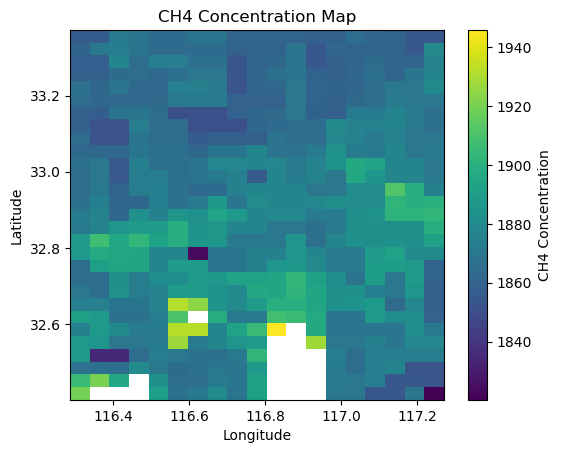

<xarray.Dataset>
Dimensions:  (x: 19, y: 29)
Coordinates:
  * x        (x) float64 116.3 116.3 116.4 116.5 ... 117.1 117.2 117.2 117.3
  * y        (y) float64 33.37 33.34 33.3 33.27 33.23 ... 32.5 32.47 32.44 32.4
Data variables:
    crs      |S1 ...
    CH4      (y, x) float32 1.857e+03 1.857e+03 1.872e+03 ... 1.87e+03 1.82e+03
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.22.2a1
    description:  
    title:        


In [63]:
ds_min = xr.open_dataset("output/prepared_data/1/CH4/min/openEO.nc")

ch4_data = ds_min['CH4']

# Plot the data
plt.imshow(ch4_data, extent=(ds_min['x'].min(), ds_min['x'].max(), ds_min['y'].min(), ds_min['y'].max()))
plt.colorbar(label='CH4 Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CH4 Concentration Map')
plt.show()

print(ds_min)

In [ ]:
filtered_CH4_plumes = pd.read_csv('filtered_CH4_plumes_fix.csv')

for index, row in filtered_CH4_plumes.iterrows():
    aoi = {"west": row['west'], "south": row['south'], "east": row['east'], "north": row['north'], "crs": "EPSG:4326"}
    
    time_period = ("2021-01-01", "2021-12-31")
    
    for band in ["S5","S6"]:
        # Sentinel 3 Data Retrieval for S5 and S6 bands
        s3_data = connection.load_collection(
            "SENTINEL3_SLSTR",
            spatial_extent=aoi,
            temporal_extent=time_period,
            bands=[band]
        )
        for reducing_function in ["min","max","mean","sd"]:
            data_mean = data.reduce_dimension(
               reducer=reducing_function, 
               dimension="t"
            )
            data_reduced = data_reduced.save_result(format="netCDF")
            job = data_reduced.create_job(title="reducing")
            job.start_and_wait()
            result = job.get_results()
            folder_path = f"output/prepared_data/{index+1}/{band}/{reducing_function}"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
            result.download_files(folder_path)


## Exercise 3.5 SVM (4 pt)

Build an SVM model using the data you prepared in Exercise 3.4

## Exercise 3.6 Discuss the approach you took in Exercises 3.4 and 3.5. (2 pt)

Some points to consider:
- Strength and weaknesses? 
- Suggestions for improvement? 
- Implications for policy-makers? 
- Possible further research questions?
- Ethical considerations?

## (Optional) Exercise 3.7 Use any other (supervised or unsupervised) classification algorithm on data you prepared in Exercise 3.4 (3 pt)

Why did you choose this algorithm? Compare to the approach and results in Exercise 3.5.

## (Optional) Exercise 3.8 Test the model from Exercise 3.5 against a different time period (3 pt)

Assume that the location of super-emitters remains relatively stable over time. As in Exercise 3.4 load the data for the point sources but now for a different time period (say, the entire 2022 or 2023). Test how well your model from Exercise 3.5 performs on this new data. Discuss

I don't have time for this exercise, sorry